<a href="https://colab.research.google.com/github/upinderkahlon/Airline-Passenger-Referral-Prediction/blob/main/Airline_Passenger_Referral_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Context: Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019.

# **Aim: To predict whether passengers will refer the airline to their friends.**

In [6]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [9]:
pip install xlrd

In [10]:
#reading the data using pandas
df = pd.DataFrame(pd.read_excel("data_airline_reviews.xlsx"))

In [11]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**There is a problem with the data every next row is empty which is of no use so we will drop those rows later...**

In [12]:
#Lets check the no of rows and columns with shape

df.shape

(131895, 17)

In [13]:
#Now lets check empty values in each column

df.isnull().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

**We are getting a lot of empty values as its due to the empty row after each row so now we will use dropna which will check the whole row and if even a single value is empty in the row than the whole row is removed and will check the data left...**

In [14]:
df=df.dropna()

In [15]:
df.shape

(14212, 17)

**So we have this much amount of data left which is quite sufficient for our machine learning models but we have made a lot of data loss which is quite obvious as there was each row empty after every row and we will not be able to find the data we have on web and we cannot even fill the empty values with mean or mode as if we will use more clean data than the accuracy we obtain will be quite right!!**

In [16]:
df.isnull().sum()

airline            0
overall            0
author             0
review_date        0
customer_review    0
aircraft           0
traveller_type     0
cabin              0
route              0
date_flown         0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

**So no empty value in any column!**

In [17]:
#Lets first check our target variable

df['recommended'].value_counts()

recommended
yes    9468
no     4744
Name: count, dtype: int64

**ohh!! A lot of recommendationns are given to friends, but a lot also don't recommend..
Value_counts()- gives the count of each variable of a column...**

# Now, lets play with data...

In [18]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


**Index is not fine let's reset it!!**

In [19]:
df=df.reset_index(drop=True)
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


In [20]:
df['airline'].unique()

array(['Turkish Airlines', 'Qatar Airways', 'Emirates', 'Lufthansa',
       'KLM Royal Dutch Airlines', 'Virgin America', 'American Airlines',
       'Delta Air Lines', 'Southwest Airlines', 'United Airlines',
       'Jetblue Airways', 'Aegean Airlines', 'Aeroflot Russian Airlines',
       'Aeromexico', 'Air Canada', 'Air New Zealand', 'Alitalia',
       'AirAsia', 'Asiana Airlines', 'Avianca', 'Austrian Airlines',
       'British Airways', 'Brussels Airlines', 'China Eastern Airlines',
       'China Southern Airlines', 'Copa Airlines', 'Ethiopian Airlines',
       'Egyptair', 'Finnair', 'Iberia', 'ANA All Nippon Airways',
       'easyJet', 'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines',
       'Qantas Airways', 'Air France', 'Etihad Airways',
       'Pegasus Airlines', 'Royal Jordanian Airlines', 'Ryanair',
       'South African Airways', 'Saudi Arabian Airlines', 'TAP Portugal',
       'Eurowings', 'EVA Air', 'Royal Air Maroc', 'Singapore Airlines',
       'SAS Scandinavian', 

**So these are all the airlines we have values in this data...**

**Now lets check the total no of airlines we have...**

In [21]:
df['airline'].nunique()

81

**So we have total 81 airlines above...**

In [22]:
df['author'].nunique()

9466

In [23]:
df.shape

(14212, 17)

**So we can see above that author column has 9466 values which are unique and we have values 14212 so there could be a chance of duplicate values but there can be a chance also that author took different flights...**

In [24]:
df['author'].value_counts().loc[lambda x : x>1]

author
Michel Perrin      53
Anders Pedersen    49
T Eldem            41
Neil Jeram         40
John Curtain       39
                   ..
Harry Lai           2
S Wardota           2
T Poon              2
T Patawot           2
Barrie Enslin       2
Name: count, Length: 2147, dtype: int64

**So above are the values or authors who are taking flight more than 1 now lets check that they are duplicate or unique in other manner...**

In [25]:
df.loc[df['author']=="Michel Perrin"]

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1502,Emirates,5.0,Michel Perrin,28th April 2017,âœ… Verified Review | Bangkok to Paris CDG via...,A380,Solo Leisure,Business Class,Bangkok to Paris CDG via Dubai,April 2017,3.0,3.0,3.0,4.0,5.0,3.0,yes
1523,Emirates,9.0,Michel Perrin,16th March 2017,âœ… Verified Review | Paris to Bangkok via Dub...,A380,Solo Leisure,First Class,Paris to Bangkok via Dubai,March 2017,4.0,5.0,5.0,5.0,4.0,5.0,yes
1934,Emirates,6.0,Michel Perrin,17th August 2015,"Nice-Dubai: Terrible check-in, where a staff m...",Boeing 777-300ER,Couple Leisure,Business Class,NCEto KIX via DXB,August 2015,4.0,4.0,3.0,5.0,1.0,3.0,yes
2099,Lufthansa,8.0,Michel Perrin,31st January 2018,âœ… Trip Verified | Kansai to Rio de Janeiro v...,Boeing 747-400,Solo Leisure,Business Class,Kansai to Rio de Janeiro via Frankfurt,January 2018,4.0,5.0,2.0,3.0,4.0,3.0,yes
2104,Lufthansa,9.0,Michel Perrin,8th January 2018,âœ… Trip Verified | Flew Frankfurt to Osaka. V...,Boeing 744,Couple Leisure,Business Class,Frankfurt to Osaka,January 2018,4.0,5.0,4.0,4.0,2.0,4.0,yes
2108,Lufthansa,9.0,Michel Perrin,2nd January 2018,âœ… Trip Verified | Rio de Janeiro to Frankfur...,Boeing 747-400,Solo Leisure,Business Class,Rio de Janeiro to Frankfurt,December 2017,4.0,5.0,4.0,4.0,2.0,4.0,yes
2207,Lufthansa,8.0,Michel Perrin,30th September 2016,I arrived 3 hours before departure of my fligh...,"A320, Boeing 747",Solo Leisure,First Class,CDG to GIG via FRA,September 2016,4.0,5.0,4.0,3.0,2.0,5.0,yes
2229,Lufthansa,9.0,Michel Perrin,12th July 2016,âœ… Verified Review | Overall a great experien...,Boeing 747-8 and A320,Solo Leisure,Business Class,GIG to MRS via FRA,July 2016,4.0,5.0,3.0,4.0,3.0,5.0,yes
2381,Lufthansa,7.0,Michel Perrin,24th July 2015,"MRS-FRA Business class on an old Boeing 737, b...",Boeing 747 / Boeing 747,Solo Leisure,Business Class,MRS-KIX via FRA,July 2015,4.0,4.0,3.0,3.0,2.0,3.0,yes
3742,United Airlines,8.0,Michel Perrin,12th January 2017,âœ… Verified Review | Los Angeles to Rio de Ja...,Boeing 737-900 / Boeing 787-8,Business,Business Class,LAX to GIG via IAH,January 2017,4.0,4.0,4.0,3.0,5.0,4.0,yes


**So we can see above that are different values each time of other columns and the values are not duplicated...**

# **Data Visualization**

In [26]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
1,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
2,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
3,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
4,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


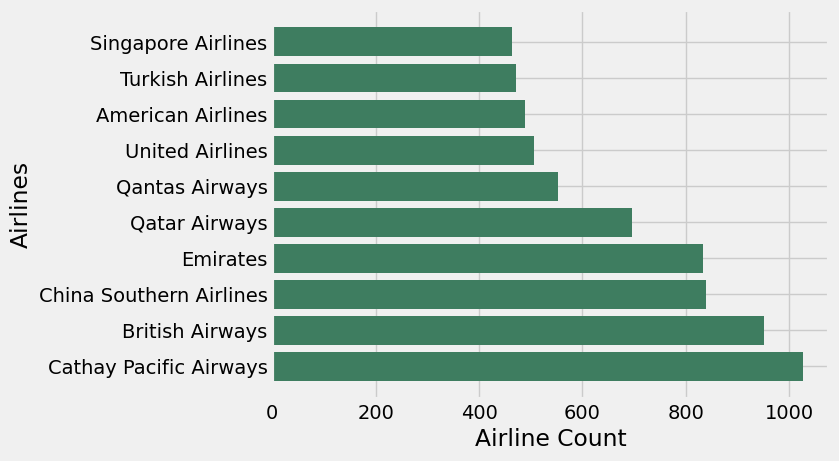

In [27]:
#Top 10 airlines---

index=df['airline'].value_counts().head(10).index
values=df['airline'].value_counts().head(10)
plt.barh(index,values,color="#3e7d60")
plt.xlabel("Airline Count")
plt.ylabel("Airlines")
plt.show()

**So Cathy Pacific Airways is the highest times used to travel by passengers...**

In [28]:
df['overall']=df['overall'].astype('int64')

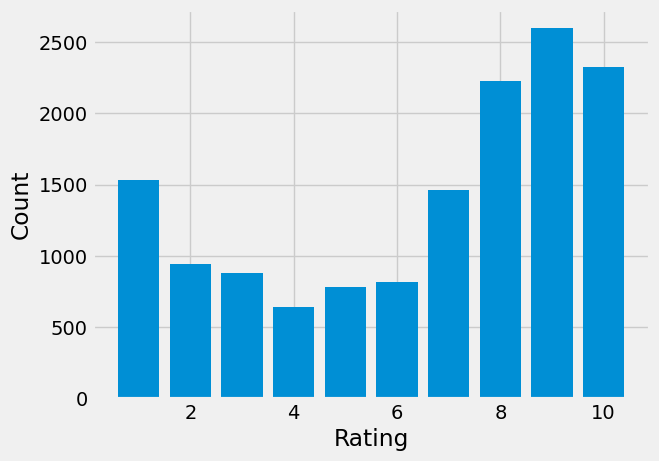

In [29]:
index=df['overall'].value_counts().index
values=df['overall'].value_counts()
plt.bar(index,values)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

**1 rating has also been given to a lot of airlines...**

In [30]:
df['airline'].loc[df['overall']==1].unique()

array(['Turkish Airlines', 'Qatar Airways', 'Emirates', 'Lufthansa',
       'KLM Royal Dutch Airlines', 'Virgin America', 'American Airlines',
       'Delta Air Lines', 'Southwest Airlines', 'United Airlines',
       'Jetblue Airways', 'Aegean Airlines', 'Aeroflot Russian Airlines',
       'Aeromexico', 'Air Canada', 'Air New Zealand', 'Alitalia',
       'AirAsia', 'Asiana Airlines', 'Avianca', 'Austrian Airlines',
       'British Airways', 'Brussels Airlines', 'China Eastern Airlines',
       'China Southern Airlines', 'Copa Airlines', 'Ethiopian Airlines',
       'Egyptair', 'Finnair', 'Iberia', 'ANA All Nippon Airways',
       'easyJet', 'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines',
       'Qantas Airways', 'Air France', 'Etihad Airways',
       'Pegasus Airlines', 'Royal Jordanian Airlines', 'Ryanair',
       'South African Airways', 'Saudi Arabian Airlines', 'TAP Portugal',
       'Eurowings', 'EVA Air', 'Royal Air Maroc', 'Singapore Airlines',
       'SAS Scandinavian', 

In [31]:
df['airline'].loc[df['overall']==1].nunique()

74

**We know earlier we have total of 81 airlines and almost 74 have been given a rating of 1 who are given above**

In [32]:
df['aircraft'].nunique()

1636

**We have a total 1636 different kinds of aircrafts.. and now lets check top 10**

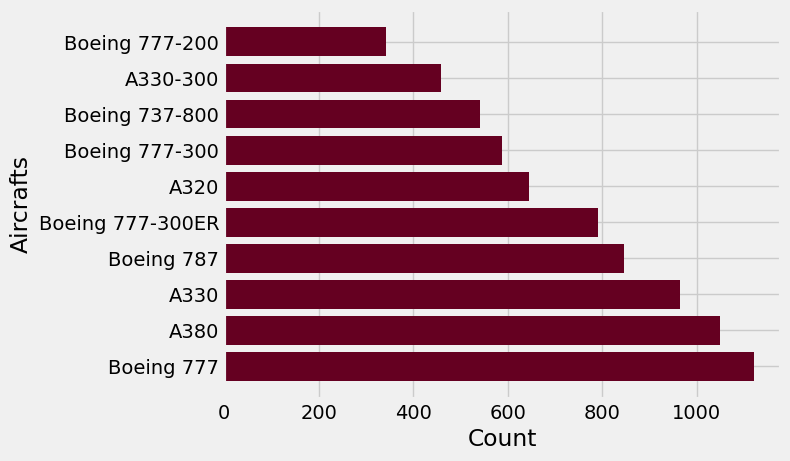

In [33]:
index=df['aircraft'].value_counts().head(10).index
values=df['aircraft'].value_counts().head(10)
plt.barh(index,values,color="#650021")
plt.xlabel("Count")
plt.ylabel("Aircrafts")
plt.show()

**Most passengers travelled from boeing 777..**


Extra Info from web:
Overall, the Boeing 777 is a reliable and efficient long-range airliner that has been popular among airlines since its introduction in 1994. If you are looking for a spacious and comfortable aircraft that can fly almost anywhere in the world non-stop, then the 777 is definitely worth considering.

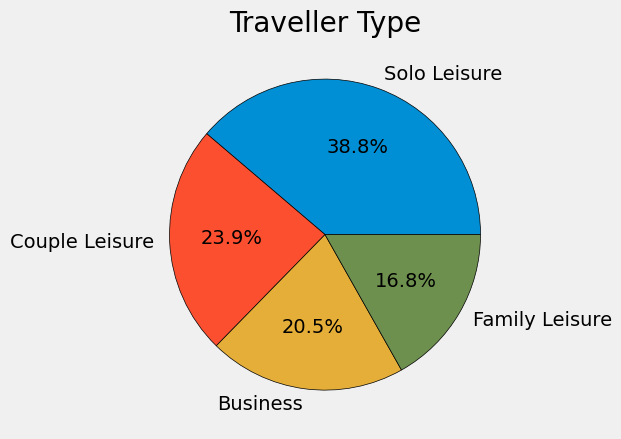

In [34]:
index=df['traveller_type'].value_counts().index
values=df['traveller_type'].value_counts()
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.title("Traveller Type")
plt.show()

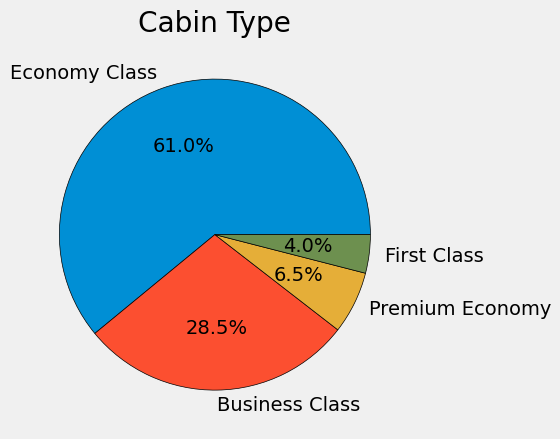

In [35]:
index=df['cabin'].value_counts().index
values=df['cabin'].value_counts()
plt.pie(values,labels=index,autopct="%1.1f%%",wedgeprops={'edgecolor':'black'})
plt.title("Cabin Type")
plt.show()

**Now lets check the route that the most passengers travelled...**

In [36]:
df['route'].value_counts()

route
Bangkok to Hong Kong           31
Singapore to Bangkok           25
BKK to LHR                     22
London to Hong Kong            20
HKG to LHR                     20
                               ..
KBP to BEG via ATH / HER        1
ATH to FCO                      1
Amsterdam to Rhodes             1
London to Chania via Athens     1
Athens to JFK via Kiev          1
Name: count, Length: 9344, dtype: int64

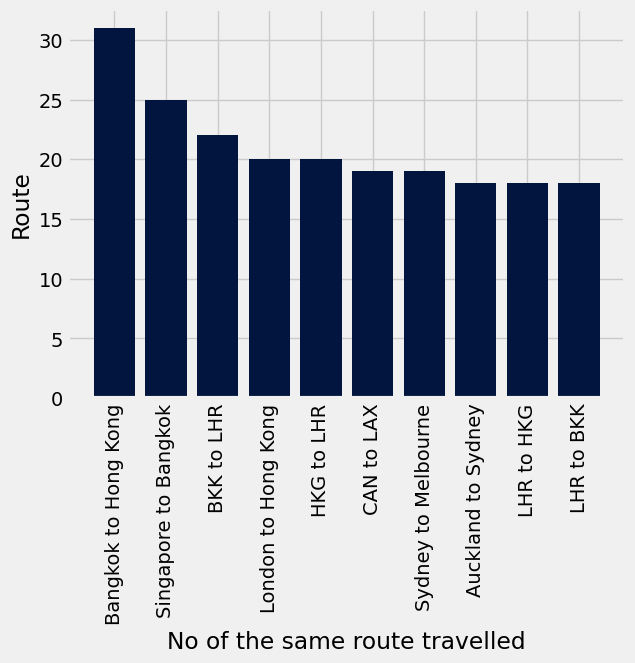

In [37]:
index=df['route'].value_counts().head(10).index
values=df['route'].value_counts().head(10)
plt.bar(index,values,color="#01153E")
plt.xticks(rotation=90)
plt.xlabel("No of the same route travelled")
plt.ylabel("Route")
plt.show()

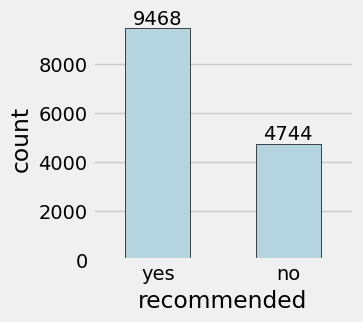

In [38]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df,x=df['recommended'],width=0.5,edgecolor='black',color='lightblue')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [39]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes
1,Turkish Airlines,2,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no
2,Turkish Airlines,6,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes
3,Turkish Airlines,1,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no
4,Turkish Airlines,2,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no


**Now lets change the dtype of columns which have float values to int as it will also be used in machine learning algorithms also...**

In [40]:
df[['seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']]=df[['seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']].astype('int64')

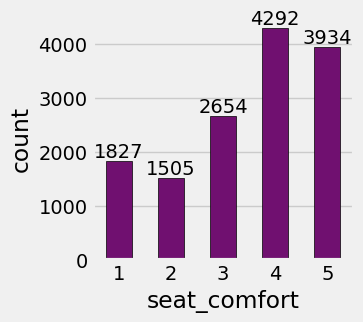

In [50]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df,x=df['seat_comfort'],width=0.5,edgecolor='black',color='#800080')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

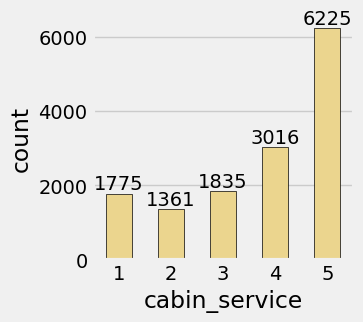

In [52]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df,x=df['cabin_service'],width=0.5,edgecolor='black',color='#FBDD7E')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

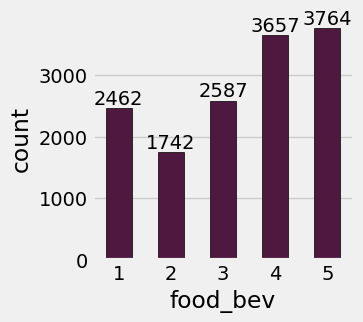

In [49]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df,x=df['food_bev'],width=0.5,edgecolor='black',color='#580F41')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

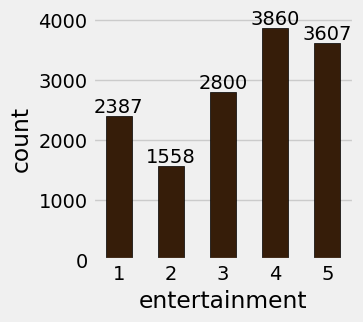

In [44]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df,x=df['entertainment'],width=0.5,edgecolor='black',color='#3D1C02')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

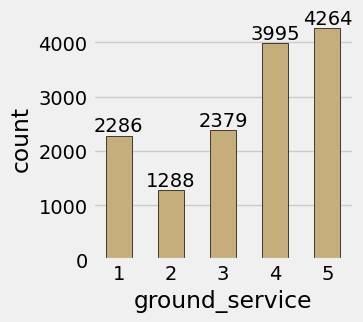

In [48]:
plt.figure(figsize=(3,3))
ax=sns.countplot(df,x=df['ground_service'],width=0.5,edgecolor='black',color='#D1B26F')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

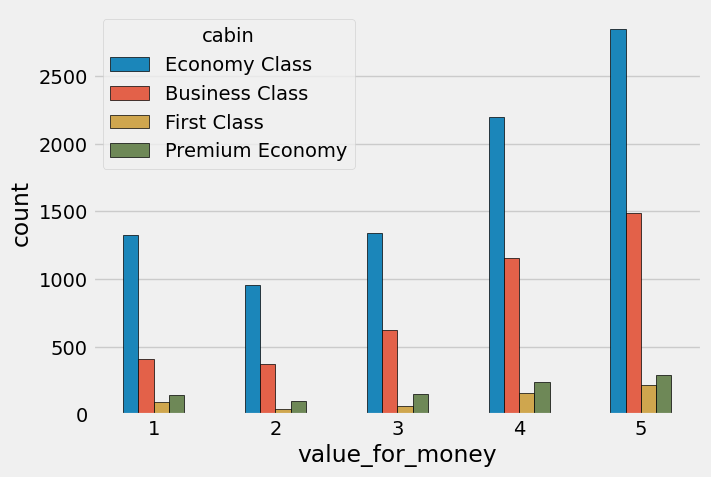

In [59]:
plt.figure(figsize=(7,5))
sns.countplot(df,x=df['value_for_money'],hue=df["cabin"],width=0.5,edgecolor='black')
plt.show()

**So we can see above that the economy class has the highest demand in all which s quite obvious because it is the cheapest of all classes**

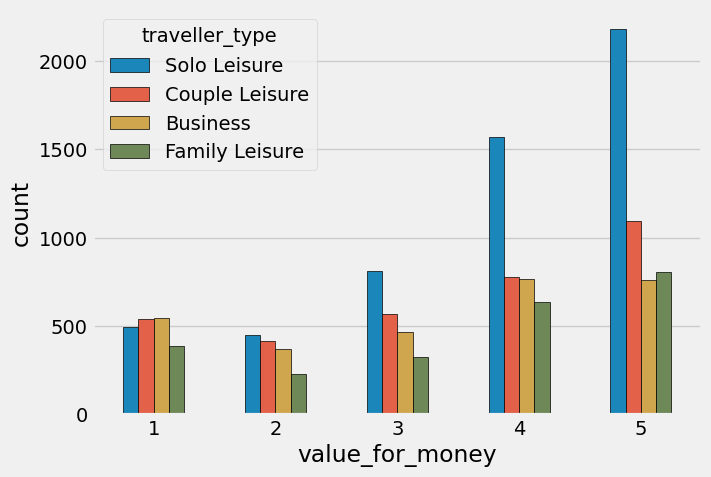

In [60]:
plt.figure(figsize=(7,5))
sns.countplot(df,x=df['value_for_money'],hue=df["traveller_type"],width=0.5,edgecolor='black')
plt.show()

**So solo leisure is mostly preferred...**

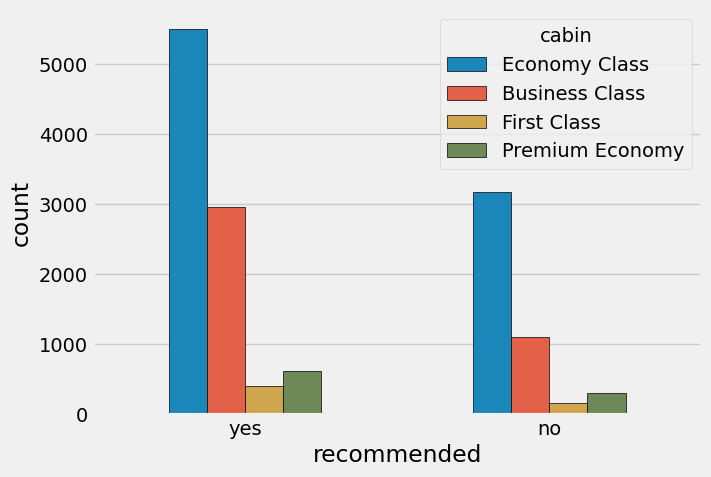

In [63]:
plt.figure(figsize=(7,5))
sns.countplot(df,x=df['recommended'],hue=df["cabin"],width=0.5,edgecolor='black')
plt.show()

**There is not a huge difference when cabin and recommended are visualised together...**

# **Machine Learning Prediction**

In [64]:
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,Turkish Airlines,10,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,Washington Dulles to Karachi,April 2019,4,5,5,5,5,5,yes
1,Turkish Airlines,2,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,Basel to Cape Town via Istanbul,April 2019,3,3,2,3,1,2,no
2,Turkish Airlines,6,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,Abu Dhabi to Luxembourg via Istanbul,April 2019,2,3,3,3,3,3,yes
3,Turkish Airlines,1,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,Venice to Boston via Istanbul,February 2019,1,1,1,1,1,1,no
4,Turkish Airlines,2,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,Houston to Kiev via Istanbul,March 2019,1,3,2,2,1,1,no


**First lets drop unwanted columns first and we will need only numerical values as machine deals with numbers only...**

In [67]:
df.dtypes

airline            object
overall             int64
author             object
review_date        object
customer_review    object
aircraft           object
traveller_type     object
cabin              object
route              object
date_flown         object
seat_comfort        int64
cabin_service       int64
food_bev            int64
entertainment       int64
ground_service      int64
value_for_money     int64
recommended        object
dtype: object

**Now we have a total of 7 integer values columns and we will also convert our main that is the target column with values 0 and 1 and also we can convert traveller_type and cabin to numerical values because we have less values..**

In [68]:
df['traveller_type'].unique()

array(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure'],
      dtype=object)

In [69]:
df['cabin'].unique()

array(['Economy Class', 'Business Class', 'First Class',
       'Premium Economy'], dtype=object)

In [70]:
df['recommended'].replace(['no', 'yes'],[0, 1], inplace=True)
df['traveller_type'].replace(['Solo Leisure', 'Couple Leisure', 'Business', 'Family Leisure'],[0,1,2,3], inplace=True)
df['cabin'].replace(['Economy Class', 'Business Class', 'First Class','Premium Economy'],[0,1,2,3], inplace=True)

In [71]:
df.dtypes

airline            object
overall             int64
author             object
review_date        object
customer_review    object
aircraft           object
traveller_type      int64
cabin               int64
route              object
date_flown         object
seat_comfort        int64
cabin_service       int64
food_bev            int64
entertainment       int64
ground_service      int64
value_for_money     int64
recommended         int64
dtype: object

In [72]:
#Lets drop unwanted columns and place them in X and y, X is for features and y is for target...

X=df.drop(['airline','author','review_date','customer_review','aircraft','route','date_flown','recommended'],axis=1)
y=df['recommended']

Train-Test Split

In [73]:
import sklearn
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [75]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9948, 9)
(9948,)
(4264, 9)
(4264,)


**Now, we have used our dataset to convert it into train and test parts so that we can get our X_train, X_test, y_train and y_test values by which we can use different models to fit and predict values with this dataset only.**

# **Logistic Regression**

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [77]:
model.fit(X_train,y_train)

LogisticRegression()

In [78]:
predictions=model.predict(X_test)

In [79]:
model.score(X_test,y_test)

0.9523921200750469

# **Decision Tree Classifier**

In [81]:
from sklearn.tree import DecisionTreeClassifier
model_2=DecisionTreeClassifier()

In [82]:
model_2.fit(X_train,y_train)

DecisionTreeClassifier()

In [83]:
predictions_2=model_2.predict(X_test)

In [84]:
model_2.score(X_test,y_test)

0.9294090056285178

# **Random Forest Classifier**

In [85]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()

In [86]:
model_3.fit(X_train,y_train)

RandomForestClassifier()

In [87]:
predictions_3=model_3.predict(X_test)

In [88]:
model_3.score(X_test,y_test)

0.9505159474671669

# **KNeighbors Classifier**

In [89]:
from sklearn.neighbors import KNeighborsClassifier
model_4=KNeighborsClassifier()

In [91]:
model_4.fit(X_train,y_train)

KNeighborsClassifier()

In [92]:
predictions_4=model_4.predict(X_test)

In [93]:
model_4.score(X_test,y_test)

0.9451219512195121

# **Support vector Machine**

In [94]:
from sklearn.svm import SVC

In [95]:
model_5=SVC()

In [96]:
model_5.fit(X_train,y_train)

SVC()

In [97]:
predictions_5=model_5.predict(X_test)

In [98]:
model_5.score(X_test,y_test)

0.9519230769230769

# **All models gave a very great accuracy as we have cleaned the data properly and there is no duplicate data**

# **So we will print our final predictions with LogisticRegression because it has the highest score...**

In [99]:
final_predictions=predictions

In [102]:
import sys
np.set_printoptions(threshold=sys.maxsize)

In [103]:
print(final_predictions)

[1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0
 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1
 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1
 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1
 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1
 0 0 1 0 0 1 0 1 1 1 1 1 

**So we got our final predictions...**

# **Hurray Completed!!**